#### Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. 

![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access a file which was made using the standard [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine. We also need some tools to access and manipulate this file:-

- [ ] UpRoot (https://uproot.readthedocs.io/en/latest/)
- [ ] Awkward (https://pypi.org/project/awkward/)
- [ ] wget (https://pypi.org/project/wget/)
- [ ] matplotlib for plotting!
- [ ] Scipy for fitting (https://scipy.org/)

In [1]:
#run this once and update for future packages you may use
%pip install uproot awkward wget matplotlib scipy
# This will also install other packages needed (xxhash, numpy, etc.) - handy.

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/871.4 kB ? eta -:--:--
   --------------------------------------- 871.4/871.4 kB 19.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/529.6 kB ? eta -:--:--
   --------------------------------------- 529.6/529.6 kB 16.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/2.1 MB 23.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=a60264a9e51c53e8abe64e0763bf7595c200367a294e45c99b98edeab992d523
  Stored in directory: c:\users\megsi\appdata\local\pip\cache\wheels\01\46\3b\e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Notice, we got a warning that these files were installed in a weird location (since packages is not writable)
# Let's fix it! We just add the directory it installed them to, to the place Python looks for packages. Simples.
!PATH=/home/jovyan/.local/bin$PATH
!echo $PATH

$PATH


In [3]:
import awkward,uproot

All being well - this should give no errors.... do not try to proceed if you get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

In [8]:
import wget
url='http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root'
download=wget.download(url)
!mkdir LHCb_Data && mv B2HHH_MagnetDown.root ./LHCb_Data/B2HHH_MagnetDown.root
# If we ALL do this too often, CERN will block our IP address....

100% [......................................................................] 666484974 / 666484974

'mv' is not recognized as an internal or external command,
operable program or batch file.


In [229]:
import wget
url='http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root'
download=wget.download(url)
#!mkdir LHCb_Data && mv B2HHH_MagnetUp.root ./LHCb_Data/B2HHH_MagnetUp.root
# If we ALL do this too often, CERN will block our IP address....

100% [......................................................................] 444723234 / 444723234

In [4]:
#Since we need to use Uproot to load our file and awkward to handle it, we must first import this into Python:
#We already did this above, it does not hurt to do it again, and if you make a new notebook in future remember this step
import uproot, awkward, numpy as np
#Then we open the ROOT file using the open command. - note you need to make this file path correct for your own setup!
f = uproot.open ("LHCb_Data/B2HHH_MagnetDown.root")
#From our file, we have to extract the DecayTree
f.keys()

['DecayTree;1']

In [6]:
#It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()
#You can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [8]:
#Now it shows us all the variables inside, their type and so on
#Let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()

## <span style='color:deepskyblue'> Note: Figure Plotting </span>

Throughout this notebook, I create figures using the following code (changing the figure type (`ax.hist`) to suit the data being plotted):
<div style="display: flex; justify-content: center;">
    <pre style="border: 1px solid black; padding: 10px; background-color: #f7f9f9;">
fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.add_subplot(1,1,1)
ax1.hist(data, bins=100, range=(-15000,15000), color='dodgerblue')
ax1.set_xlabel('X Momentum of H1', fontsize=14)
plt.show()    </pre>
</div>

This allows me to easily create multiple subplots for future exercises, and specify where to place them on the screen using `GridSpec` to arrange the multiple plots nicely.

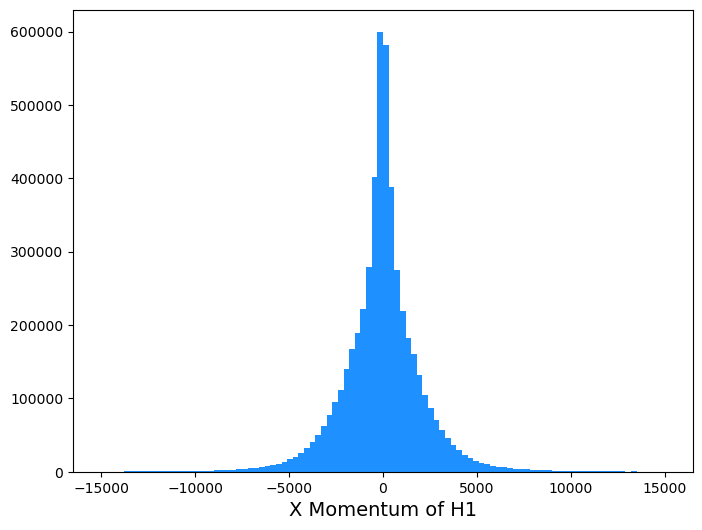

In [12]:
#lets plot something!
import matplotlib.pylab as plt
# make a place to plot something
fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.add_subplot(1,1,1)
ax1.hist(data, bins=100, range=(-15000,15000), color='dodgerblue')
ax1.set_xlabel('X Momentum of H1', fontsize=14)
plt.show()

<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?

## <span style='color:deepskyblue'> Total Daughter Momentum </span>

Using Pythagoras' Theorem, we can say
$$ \vec{p}_{tot} = p_x^2 + p_y^2 + p_z^2 $$
for each of the daughter particles.

For the total momentum of the mother B meson particle, $ \vec{p}_{tot}^{B} $,

$$ p_x = p_{x, H1} + p_{x, H2} + p_{x, H3} $$
$$ p_y = p_{y, H1} + p_{y, H2} + p_{y, H3} $$
$$ p_z = p_{z, H1} + p_{z, H2} + p_{z, H3} $$

The momentum of each daughter particle is put into an array (e.g. `Events['H1_PX'].array()`) and a histogram of the total momentum is plotted (first for H1 and then for the mother B meson below), using 100 bins for this.

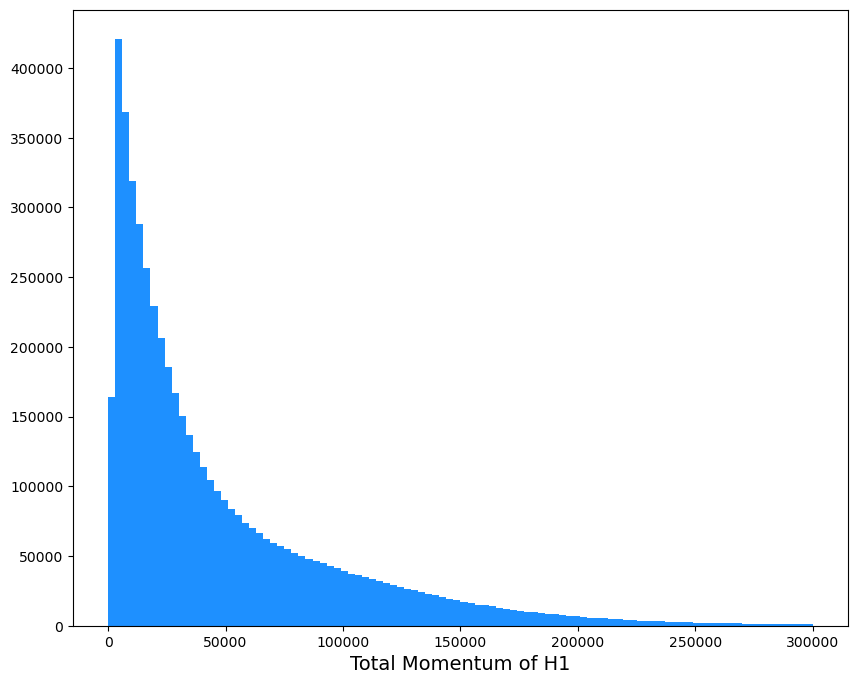

In [15]:
#Here make a plot of the Total momentum of each of the three daughters
#First is to access the data from the Decay tree and either load one array per variable or a large array with each variable as another column
Events=f['DecayTree']
H1_PX = Events['H1_PX'].array()
H1_PY = Events['H1_PY'].array()
H1_PZ = Events['H1_PZ'].array()

# once the data is extracted you will need to do some mathematics to calculate total momentum from the three components
H1_Ptot = (H1_PX**2 + H1_PY**2 + H1_PZ**2)**(1/2)

# then here you can plot something (remember to adjust the range)
fig2 = plt.figure(figsize=(10,8))
ax2 = fig2.add_subplot(1,1,1)
ax2.hist(H1_Ptot, bins=100, range=(0,300000), color='dodgerblue')
ax2.set_xlabel('Total Momentum of H1', fontsize=14)
plt.show()

In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).

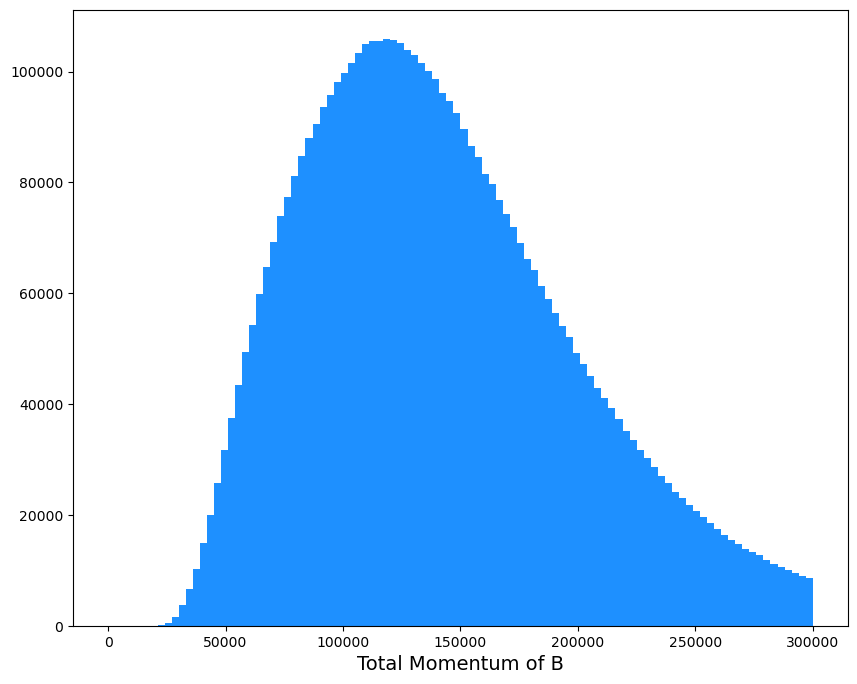

In [18]:
#Next we need to repeat these things in order to plot the momentum of the mother
#Again, think about how we calculate the momentum of a mother particle in this case...

H2_PX = Events['H2_PX'].array()
H2_PY = Events['H2_PY'].array()
H2_PZ = Events['H2_PZ'].array()
H2_Ptot = np.sqrt(H2_PX**2 + H2_PY**2 + H2_PZ**2)

H3_PX = Events['H3_PX'].array()
H3_PY = Events['H3_PY'].array()
H3_PZ = Events['H3_PZ'].array()
H3_Ptot = np.sqrt(H3_PX**2 + H3_PY**2 + H3_PZ**2)

## assuming all momentum of B is conserved in H1, H2, H3
B_Ptot = np.sqrt((H1_PX + H2_PX + H3_PX)**2 + (H1_PY + H2_PY + H3_PY)**2 + (H1_PZ + H2_PZ + H3_PZ)**2)

fig3 = plt.figure(figsize=(10,8))
ax3 = fig3.add_subplot(1,1,1)
ax3.hist(B_Ptot, bins=100, range=(0,300000), color='dodgerblue')
ax3.set_xlabel('Total Momentum of B', fontsize=14)
plt.show()

So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [33]:
# lets load the data in a slightly different way:
# Lets take our decay tree and just make it an array with a header which is the name of the variable
branches=Events.arrays()
# figure out how to convert to the python 'list' format and use it there
branches_dictionary=branches.tolist()
# now we just make some pretty printing and loop over all items in the dictionary relating to one particular entry (e.g. number 45)
print ("Event number #45")
print ("-------------------")
for branch, value in branches_dictionary[45].items():
    print ("%s  :  %s"%(branch, value))

Event number #45
-------------------
B_FlightDistance  :  257.00205776946603
B_VertexChi2  :  1.865567179221614
H1_PX  :  420.3413896413646
H1_PY  :  -110.66276079201207
H1_PZ  :  5883.766388082404
H1_ProbK  :  0.012183159589767456
H1_ProbPi  :  0.8191394209861755
H1_Charge  :  -1
H1_IPChi2  :  27121.53690741779
H1_isMuon  :  1
H2_PX  :  -985.6367588987478
H2_PY  :  630.9893539299605
H2_PZ  :  35342.13861801284
H2_ProbK  :  0.6670113801956177
H2_ProbPi  :  0.04563945531845093
H2_Charge  :  1
H2_IPChi2  :  13712.438218214942
H2_isMuon  :  0
H3_PX  :  -6242.300384410311
H3_PY  :  -862.2130979651508
H3_PZ  :  277275.49225626234
H3_ProbK  :  0.07501816749572754
H3_ProbPi  :  0.428352952003479
H3_Charge  :  1
H3_IPChi2  :  1026.12298434195
H3_isMuon  :  0


Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.

## <span style='color:deepskyblue'> Mass-Energy Calculations </span>

Using $E^2 = p^2 + m^2$ and $m_{K^\pm} = 493.677 \pm 0.013 MeV$ (P.A. Zyla et al. (Particle Data Group), Prog. Theor. Exp. Phys. 2020, 083C01 (2020) and 2021 update), the Energy of each of the Kaons is calculated. 

In [48]:
m_Kaon = 493.677
H1_E = np.sqrt(H1_Ptot**2 + m_Kaon**2)
H2_E = np.sqrt(H2_Ptot**2 + m_Kaon**2)
H3_E = np.sqrt(H3_Ptot**2 + m_Kaon**2)

We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

## <span style='color:deepskyblue'> Mass of the B meson </span>

The same $E^2 = p^2 + m^2$ equation is used to calculate the energy and momentum for the B meson from the daughter Kaons, giving a histogram with a peak at roughly $5400 MeV/c^2$. The theoretical value given is $5279.34 MeV/c^2$, so this peak is slightly shifted higher, but not overly significantly.

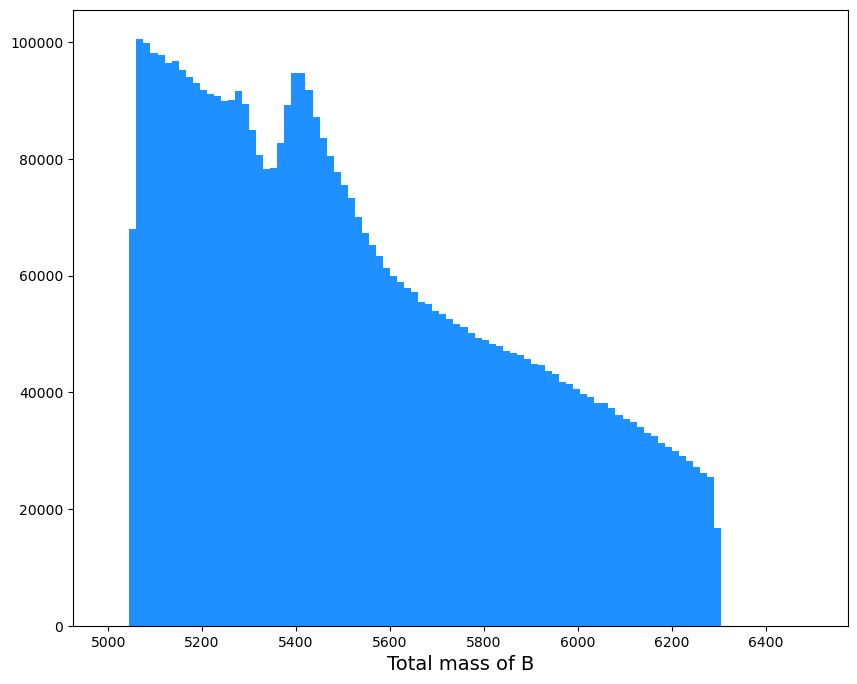

In [54]:
#Energy and momentum is conserved so we can find the quantities for B from her daughters
B_Etot = H1_E + H2_E + H3_E
B_mass = np.sqrt(B_Etot**2 - B_Ptot**2)

#Now plot a histogram of the range of masses of the B meson.
fig4 = plt.figure(figsize=(10,8))
ax4 = fig4.add_subplot(1,1,1)
ax4.hist(B_mass, bins=100, range=(5000,6500), color='dodgerblue')
ax4.set_xlabel('Total mass of B', fontsize=14)
plt.show()

#Does this match what we would expect from theory?
## theoretical value: 5279.34 MeV/c^2
#Hint - look it up

We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

## <span style='color:deepskyblue'> Probability Histograms </span>

The probabilities of H1/H2/H3 being a Kaon or a Pion are plotted on the histograms below. The Kaon probability has most of the distribution towards 0, whilst the Pion probability is much more varied and doesn't especially show a trend. 

For these plots, I opted to use stacked histograms to assist visualisation of the data. I found that overlayed histograms obscured the data and made it impossible to read and interpret.

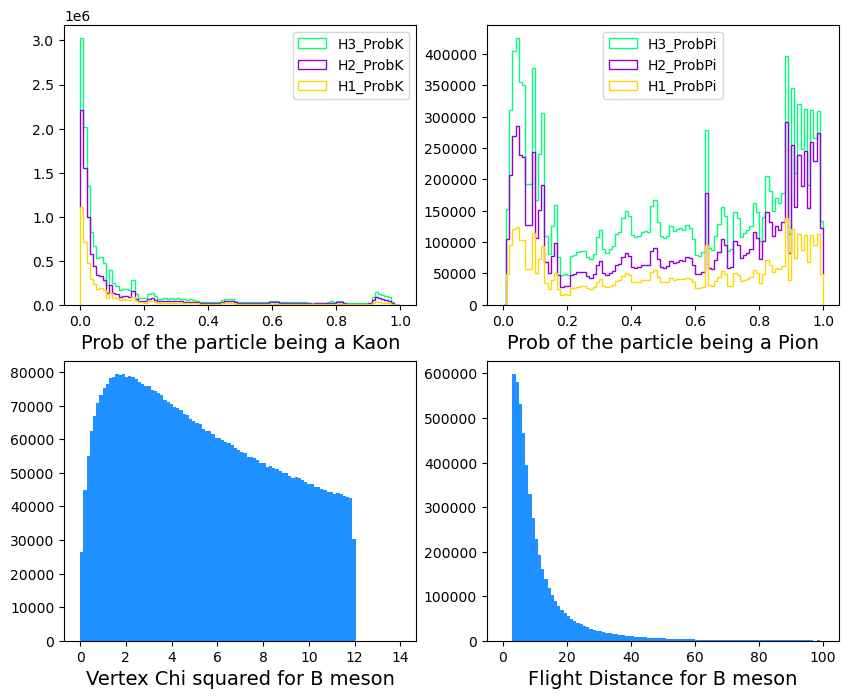

In [56]:
from matplotlib import gridspec
#Make plots of H1/H2/H3 _ProbK on one plot
H1_ProbK = Events['H1_ProbK'].array()
H2_ProbK = Events['H2_ProbK'].array()
H3_ProbK = Events['H3_ProbK'].array()

#Make plots of H1/H2/H3 _ProbPi on one plot
H1_ProbPi = Events['H1_ProbPi'].array()
H2_ProbPi = Events['H2_ProbPi'].array()
H3_ProbPi = Events['H3_ProbPi'].array()

##stacked histograms
fig5 = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

ax5 = fig5.add_subplot(gs[0, 0])
ax5.hist([H1_ProbK, H2_ProbK, H3_ProbK], 
         bins=100, stacked=True, 
         label=['H1_ProbK', 'H2_ProbK', 'H3_ProbK'], 
         range=(0,1), histtype='step',
         color=['gold', 'darkviolet', 'springgreen'])
ax5.set_xlabel('Prob of the particle being a Kaon', fontsize=14)
ax5.legend()

ax6 = fig5.add_subplot(gs[0, 1])
ax6.hist([H1_ProbPi, H2_ProbPi, H3_ProbPi], 
         bins=100, stacked=True, 
         label=['H1_ProbPi', 'H2_ProbPi', 'H3_ProbPi'], 
         range=(0,1), histtype='step',
         color=['gold', 'darkviolet', 'springgreen'])
ax6.set_xlabel('Prob of the particle being a Pion', fontsize=14)
ax6.legend()

#For all our particles, make a plot of the B_VertexChi2
B_VertexChi2 = Events['B_VertexChi2'].array()

ax7 = fig5.add_subplot(gs[1, 0])
ax7.hist(B_VertexChi2, bins=100, range=(0,14), color='dodgerblue')
ax7.set_xlabel('Vertex Chi squared for B meson', fontsize=14)

# Plot any other variables from the list above you think would be handy to use in a selection...
B_FlightDistance = Events['B_FlightDistance'].array()

ax8 = fig5.add_subplot(gs[1, 1])
ax8.hist(B_FlightDistance, bins=100, range=(0, 100), color='dodgerblue')
ax8.set_xlabel('Flight Distance for B meson', fontsize=14)

plt.show()

Using these plots, we can now think about making a preselection. This has some format like the below:

## <span style='color:deepskyblue'> Selections </span>

For my selection criteria, I wanted to filter through branches where the daughter particles are not Muons, have a high probability of being a Kaon, and a low probability of being a Pion. I decided the best way to do this was to set the probability of being a Kaon higher than the probability of being a Pion, in order to keep as many data points as possible. This was chosen as also setting the probability of being a Kaon higher than 50% (after the probability is higher than Pion probability) reduces the available dataset by roughly half.

When applying this selection criteria to the original data and plotting the x momentum of H2, we can see that the filtered data has a wider spread of momentum, and not as steep a peak count. 

In [35]:
## not muons, high prob for Kaons, low prob for Pions
## selection for daughters to: not be muons; have a higher probability of being Kaons than probability of being Pions
selection7 = (branches['H1_isMuon']!=1) & (branches['H2_isMuon']!=1) & (branches['H3_isMuon']!=1) & (branches['H1_ProbK']>branches['H1_ProbPi']) & (branches['H2_ProbK']>branches['H2_ProbPi']) & (branches['H3_ProbK']>branches['H3_ProbPi'])

In [39]:
## aim for 25k to 100k events after selection
import awkward as ak
print(type(selection7))
print(ak.sum(selection7))

<class 'awkward.highlevel.Array'>
38744


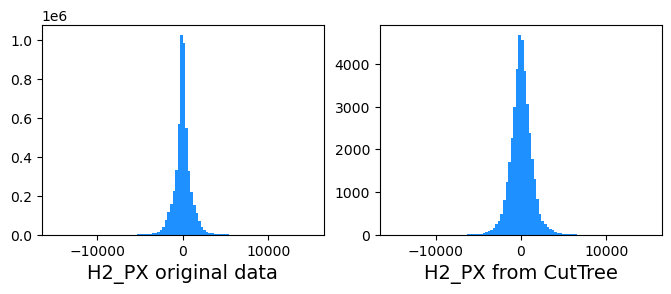

In [257]:
#To apply the selection - we can use the selection command after our instruction e.g.:
CutTree=branches['H2_PX'][selection7]
len(CutTree)
#probably we can make this more generic - try below if you like...
#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree

#Try plotting our H2_PX distribution with and without the selection and spot the differences...

fig9 = plt.figure(figsize=(8,6))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

ax9 = fig9.add_subplot(gs[0, 0])
ax9.hist(H2_PX, bins=100, range=(-15000,15000), color='dodgerblue')
ax9.set_xlabel('H2_PX original data', fontsize=14)

ax10 = fig9.add_subplot(gs[0, 1])
ax10.hist(CutTree, bins=100, range=(-15000,15000), color='dodgerblue')
ax10.set_xlabel('H2_PX from CutTree', fontsize=14)

plt.show()

In [44]:
## selection7 - 38744 events

Tree_filt2 = branches[selection7]
print(Tree_filt2.fields)

['B_FlightDistance', 'B_VertexChi2', 'H1_PX', 'H1_PY', 'H1_PZ', 'H1_ProbK', 'H1_ProbPi', 'H1_Charge', 'H1_IPChi2', 'H1_isMuon', 'H2_PX', 'H2_PY', 'H2_PZ', 'H2_ProbK', 'H2_ProbPi', 'H2_Charge', 'H2_IPChi2', 'H2_isMuon', 'H3_PX', 'H3_PY', 'H3_PZ', 'H3_ProbK', 'H3_ProbPi', 'H3_Charge', 'H3_IPChi2', 'H3_isMuon']


In [50]:
C2_H1_PX = Tree_filt2['H1_PX']
C2_H1_PY = Tree_filt2['H1_PY']
C2_H1_PZ = Tree_filt2['H1_PZ']
C2_H1_Ptot = np.sqrt(C2_H1_PX**2 + C2_H1_PY**2 + C2_H1_PZ**2)

C2_H2_PX = Tree_filt2['H2_PX']
C2_H2_PY = Tree_filt2['H2_PY']
C2_H2_PZ = Tree_filt2['H2_PZ']
C2_H2_Ptot = np.sqrt(C2_H2_PX**2 + C2_H2_PY**2 + C2_H2_PZ**2)

C2_H3_PX = Tree_filt2['H3_PX']
C2_H3_PY = Tree_filt2['H3_PY']
C2_H3_PZ = Tree_filt2['H3_PZ']
C2_H3_Ptot = np.sqrt(C2_H3_PX**2 + C2_H3_PY**2 + C2_H3_PZ**2)

## assuming all momentum of B is conserved in H1, H2, H3
C2_B_Ptot = np.sqrt((C2_H1_PX + C2_H2_PX + C2_H3_PX)**2 + (C2_H1_PY + C2_H2_PY + C2_H3_PY)**2 + (C2_H1_PZ + C2_H2_PZ + C2_H3_PZ)**2)

#m_Kaon = 493.677 - defined earlier
C2_H1_E = np.sqrt(C2_H1_Ptot**2 + m_Kaon**2)
C2_H2_E = np.sqrt(C2_H2_Ptot**2 + m_Kaon**2)
C2_H3_E = np.sqrt(C2_H3_Ptot**2 + m_Kaon**2)

C2_B_Etot = C2_H1_E + C2_H2_E + C2_H3_E
C2_B_mass = np.sqrt(C2_B_Etot**2 - C2_B_Ptot**2)

## <span style='color:deepskyblue'> B meson Mass Comparison </span>

Plotting the non-filtered and post-filtered mass distribution of the B meson shows the peak shifted more towards the theoretical mass value. I have reduced the number of events from 5135823 to 38744.

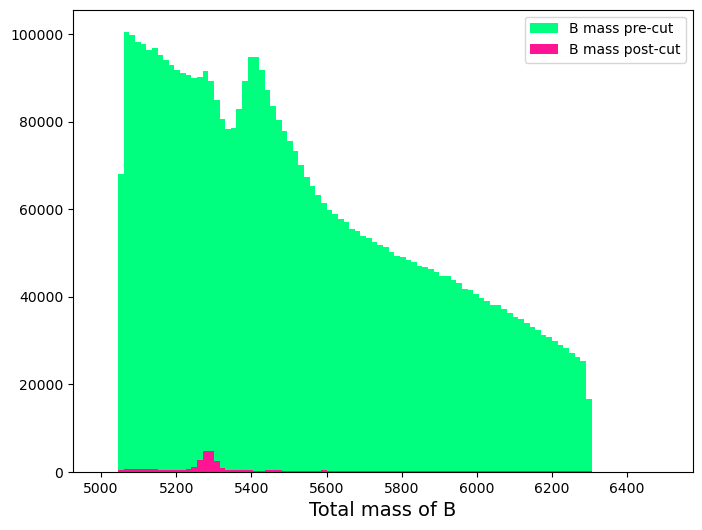

In [56]:
fig12 = plt.figure(figsize=(8,6))
ax12 = fig12.add_subplot(1,1,1)

ax12.hist(B_mass, bins=100, range=(5000,6500), label='B mass pre-cut', color='springgreen')
ax12.hist(C2_B_mass, bins=100, range=(5000,6500), label='B mass post-cut', color='deeppink')

#ax11.set_ylim(0,10000)
ax12.set_xlabel('Total mass of B', fontsize=14)
ax12.legend()
plt.show()

In [59]:
print(len(B_mass))
print(len(C2_B_mass))

5135823
38744


In [ ]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the pre-cuts and the CutTree (post-cuts)
#What do you notice about your histogram now?
#You can also use len() to find the number of entries in each.

# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

## <span style='color:deepskyblue'> Fitting </span>

Fitting the filtered B meson mass to an exponential+gaussian distribution fits the curve to the peak in the distribution. This is done by setting the `x2_data` as the centre of the histogram bins, and `y2_data` as the height of the histogram bins, and providing some initial parameters to `curve_fit`. These initial parameters chosen are:
<div style="display: flex; justify-content: center;">
    <pre style="border: 1px solid black; padding: 10px; background-color: #f7f9f9;">
A_init = max(y3_data)
mu_init = x2_data[np.argmax(y2_data)]
sigma_init = np.std(C2_B_mass)
d_init = max(y3_data)
e_init = -1
f_init = min(y3_data)    </pre>
</div>

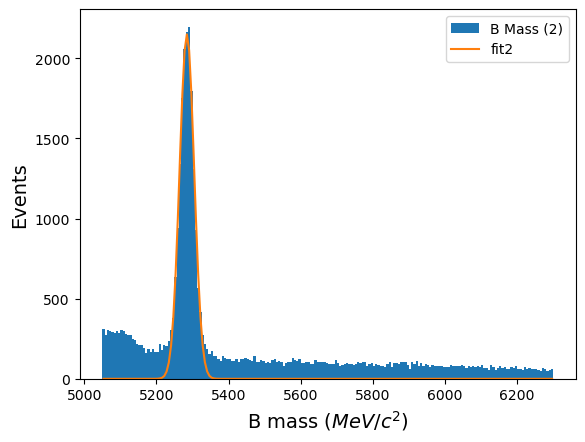

In [251]:
## using selection7

# Grab another package
from scipy.optimize import curve_fit

# we make a plot (plt.hist) and then we extract the bin height and it's edges from the plot...
bin_height2, bin_edge2, _=plt.hist(C2_B_mass, bins=200, range=(min(C2_B_mass),max(C2_B_mass)), label = "B Mass (2)")

# now we need to turn this into the x and y data for our fit. *Be careful* - you don't want the edges of the histogram bins directly - but something related
x2_data = (bin_edge2[:-1] + bin_edge2[1:]) / 2
y2_data = bin_height2

#Create a Gauss function for fitting - nothing needs changing here
def gauss (x, *p):
    A, mu, sigma = p
    return A*np.exp(-((x-mu)**2)/(2.*sigma**2))

A_init = max(y2_data)
mu_init = x2_data[np.argmax(y2_data)]
sigma_init = np.std(C2_B_mass)

## p0=[A, mu, sigma] -> initial guesses for these values
# Get the fitted curve
optimisedParameters, pcov = curve_fit(gauss, x2_data, y2_data, p0=[A_init, mu_init, sigma_init])

y2_fit = gauss(x2_data, *optimisedParameters)

plt.plot(x2_data, y2_fit, label='fit2')
plt.xlabel(r"B mass ($MeV/c^2$)", fontsize=14)
plt.ylabel("Events", fontsize=14)
plt.legend()
plt.show()

C:\Users\megsi\AppData\Local\Temp\ipykernel_13508\1548828107.py:23: OptimizeWarning: Covariance of the parameters could not be estimated
  optimisedParameters2, pcov = curve_fit(exp_gauss, x2_data, y2_data, p0=[A_init, mu_init, sigma_init, d_init, e_init, f_init])


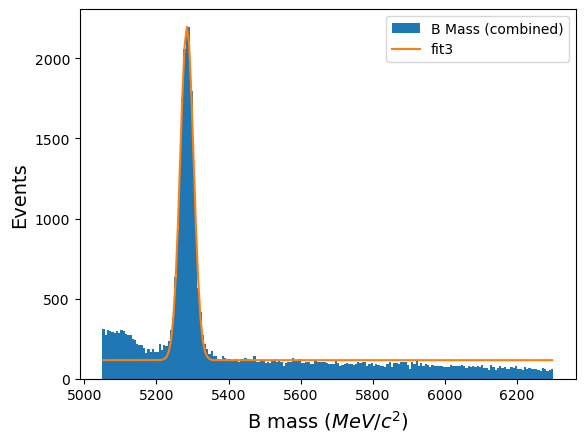

In [174]:
# Explore optimisedParameters - what does it contain? 
# Look at the documentation for Scipy Curve_Fit and try to add another curve - we need a background 
# which has an exponential shape - and we want to make a combined model to fit which contains both
# the gauss and the exponential...

bin_height3, bin_edge3, _=plt.hist(C2_B_mass, bins=200, range=(min(C2_B_mass),max(C2_B_mass)), label = "B Mass (combined)")

def exp_gauss(x, A, mu, sigma, d, e, f):
    gauss = A*np.exp(-((x-mu)**2)/(2.*sigma**2))
    exp = d * np.exp(e * x) + f
    return gauss + exp ## sum of both models

x3_data = (bin_edge3[:-1] + bin_edge3[1:]) / 2
y3_data = bin_height3

A_init = max(y3_data)
mu_init = x2_data[np.argmax(y2_data)]
sigma_init = np.std(C2_B_mass)
d_init = max(y3_data)
e_init = -1
f_init = min(y3_data)

optimisedParameters2, pcov = curve_fit(exp_gauss, x2_data, y2_data, p0=[A_init, mu_init, sigma_init, d_init, e_init, f_init])

y3_fit = exp_gauss(x3_data, *optimisedParameters2)

plt.plot(x3_data, y3_fit, label='fit3')
plt.xlabel(r"B mass ($MeV/c^2$)", fontsize=14)
plt.ylabel('Events', fontsize=14)
plt.legend()
plt.show()

Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

# Counting 

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

## <span style='color:deepskyblue'> Counting </span>

To create my selection for filtering for $B^+$ or $B^-$ I first calculated the total charge for each event (`total_charge`) and checked if there were any with 0 or 3. In this case, there are none present, so I went ahead and created the Boolean masks for each mother particle. I could check the length of each mask and make sure the total number of events still added up to the initial number of events using `ak.sum(selection)`.

From these masks, I could then calculate the asymmetry and associated error using:
<div style="display: flex; justify-content: center;">
    <pre style="border: 1px solid black; padding: 10px; background-color: #f7f9f9;">
## computing asymmetry
asym = (ak.sum(negative) - ak.sum(positive)) / (ak.sum(negative) + ak.sum(positive))

\#\# Compute Uncertainty
sigma_asym = np.sqrt((1 - asym**2) / (ak.sum(negative) + ak.sum(positive)))    </pre>
</div>

This gave a value of the asymmetry for the magnet down configuration of $-4.34 \cdot 10^{02} \pm 5.08 \cdot 10^{03}$.

In [219]:
## computing total charge per event
total_charge = Tree_filt2["H1_Charge"] + Tree_filt2["H2_Charge"] + Tree_filt2["H3_Charge"]

## checking if total_charge contains any 0 or 3
contains_zero = ak.any(total_charge == 0)
contains_three = ak.any(total_charge == 3)

## print the results
print("Contains 0:", contains_zero)
print("Contains 3:", contains_three)

Contains 0: False
Contains 3: False


In [64]:
## 1 positive charge
negative = (Tree_filt2['H1_Charge']>0) & (Tree_filt2['H2_Charge']<0) & (Tree_filt2['H3_Charge']<0) | (Tree_filt2['H1_Charge']<0) & (Tree_filt2['H2_Charge']>0) & (Tree_filt2['H3_Charge']<0) | (Tree_filt2['H1_Charge']<0) & (Tree_filt2['H2_Charge']<0) & (Tree_filt2['H3_Charge']>0)
## 2 positive charge
positive = (Tree_filt2['H1_Charge']>0) & (Tree_filt2['H2_Charge']>0) & (Tree_filt2['H3_Charge']<0) | (Tree_filt2['H1_Charge']<0) & (Tree_filt2['H2_Charge']>0) & (Tree_filt2['H3_Charge']>0) | (Tree_filt2['H1_Charge']<0) & (Tree_filt2['H2_Charge']<0) & (Tree_filt2['H3_Charge']>0)

In [227]:
## computing asymmetry
asym = (ak.sum(negative) - ak.sum(positive)) / (ak.sum(negative) + ak.sum(positive))

# Compute Uncertainty
sigma_asym = np.sqrt((1 - asym**2) / (ak.sum(negative) + ak.sum(positive)))

print(f"Asymmetry: {asym:.2e} \u00b1 {sigma_asym:.2e}")

Asymmetry: -4.34e-02 ± 5.08e-03


# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other. 

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

## <span style='color:deepskyblue'> Magnet Up Configuration </span>

I repeat the relevant sections of code for the magnet up configuration (opening the file, creating a selection for the probabilities, checking if 0 or 3 positive charges, creating a selection for $B^-$ and $B^+$, and calculating the asymmetry and associated error).

This gave a value of the asymmetry for the magnet up configuration of $-4.34 \cdot 10^{02} \pm 5.08 \cdot 10^{03}$.

In [233]:
g = uproot.open("LHCb_Data/B2HHH_MagnetUp.root")
g.keys()
Events_Up = g["DecayTree"]
branches_Up = Events.arrays()
branches_Up_dictionary = branches_Up.tolist()

In [235]:
selection_Up = (branches_Up['H1_isMuon']!=1) & (branches_Up['H2_isMuon']!=1) & (branches_Up['H3_isMuon']!=1) & (branches_Up['H1_ProbK']>branches_Up['H1_ProbPi']) & (branches_Up['H2_ProbK']>branches_Up['H2_ProbPi']) & (branches_Up['H3_ProbK']>branches_Up['H3_ProbPi'])
Tree_Up_filt = branches_Up[selection_Up]

In [237]:
## calculating: checking if 0 or 3 +ve charges
## computing total charge per event
total_charge_Up = Tree_Up_filt["H1_Charge"] + Tree_Up_filt["H2_Charge"] + Tree_Up_filt["H3_Charge"]

## checking if total_charge contains any 0 or 3
Up_contains_zero = ak.any(total_charge_Up == 0)
Up_contains_three = ak.any(total_charge_Up == 3)

## print the results
print("Contains 0:", Up_contains_zero)
print("Contains 3:", Up_contains_three)

Contains 0: False
Contains 3: False


In [241]:
## 1 positive charge
negative_Up = (Tree_Up_filt['H1_Charge']>0) & (Tree_Up_filt['H2_Charge']<0) & (Tree_Up_filt['H3_Charge']<0) | (Tree_Up_filt['H1_Charge']<0) & (Tree_Up_filt['H2_Charge']>0) & (Tree_Up_filt['H3_Charge']<0) | (Tree_Up_filt['H1_Charge']<0) & (Tree_Up_filt['H2_Charge']<0) & (Tree_Up_filt['H3_Charge']>0)
## 2 positive charge
positive_Up = (Tree_Up_filt['H1_Charge']>0) & (Tree_Up_filt['H2_Charge']>0) & (Tree_Up_filt['H3_Charge']<0) | (Tree_Up_filt['H1_Charge']<0) & (Tree_Up_filt['H2_Charge']>0) & (Tree_Up_filt['H3_Charge']>0) | (Tree_Up_filt['H1_Charge']<0) & (Tree_Up_filt['H2_Charge']<0) & (Tree_Up_filt['H3_Charge']>0)

In [243]:
## calculating: asymmetry and uncertainty
## computing asymmetry
asym_Up = (ak.sum(negative_Up) - ak.sum(positive_Up)) / (ak.sum(negative_Up) + ak.sum(positive_Up))

# Compute Uncertainty
sigma_asym_Up = np.sqrt((1 - asym_Up**2) / (ak.sum(negative_Up) + ak.sum(positive_Up)))

print(f"Asymmetry: {asym_Up:.2e} \u00b1 {sigma_asym_Up:.2e}")

Asymmetry: -4.34e-02 ± 5.08e-03


## <span style='color:deepskyblue'> Asymmetry Comparison </span>

Magnet Down: Asymmetry: $-4.34 \cdot 10^{02} \pm 5.08 \cdot 10^{03}$
Magnet Up: Asymmetry: $-4.34 \cdot 10^{02} \pm 5.08 \cdot 10^{03}$

The values calculated for the asymmetry and associated error are the same for both the magnet down and the magnet up configurations. They are both the same magnitude and the same sign, so no detector effects in motion.

The negative asymmetry means that there are more $B^+$ events than $B^-$ events. This could indicate a production or detection bias favouring $B^+$ (particle) mesons over $B^-$ (antiparticle) mesons, and this assists with the explanation of why there is more matter than antimatter in the universe, despite only being a very slight shift to more matter.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons (K- and the Heavy K+) & (K- and the light K+)

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your plotting

In [ ]:
#Make the revised Dalitz plot here for only B+ mesons

In [ ]:
#Make the revised Dalitz plot here for only B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)